In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy.random as rn
%matplotlib inline

In [6]:
# first read the data
df = pd.read_csv('EgoAlterProfiles.txt' , sep ='\t') # txt file is seperated by \t

egos have egoID ranging from 1-34006, alters have id ranging from 34007-2516190

In [64]:
df[df['IsEgo']]['ID']

0            1
1            2
2            3
3            4
4            5
         ...  
34001    34002
34002    34003
34003    34004
34004    34005
34005    34006
Name: ID, Length: 34006, dtype: int64

In [65]:
df[df['IsEgo']==False]['ID']

34006        34007
34007        34008
34008        34009
34009        34010
34010        34011
            ...   
2516185    2516186
2516186    2516187
2516187    2516188
2516188    2516189
2516189    2516190
Name: ID, Length: 2482184, dtype: int64

In [7]:
# we only use egos for this plot
egos = df[df['IsEgo'] == True]

In [8]:
# fetch ego ID and utc_offset
user_utc = egos[['ID','utc_offset','lang']]
user_utc = user_utc[pd.notnull(user_utc['utc_offset'])]
# rename the column for later merge
user_utc.rename(columns = {'ID':'egoID'},inplace = True)

In [9]:
# read timeline data
# checked out encoding type is ISO-8859-1
# parse datetime string in to Datetime
timeline = pd.read_csv('EgoTimelines.txt', sep ="\t",encoding = "ISO-8859-1",
                   keep_default_na = False, parse_dates = [4] )

In [26]:
timeline.head()

,replyto_userid,retweeted_userid,id,tweetid,created_at,hashtags,urls,mentions_ids,retweet_count,egoID,retweetedUserID,replytoUserID,metionID,kind
0,,,398477318,249552537051598848,2012-09-22 16:55:35+00:00,,,2810549959,0,1,NA,NA,,0
1,,,398477318,249537963145433088,2012-09-22 15:57:41+00:00,,,2810549959,0,1,NA,NA,,0
2,,,398477318,129377372209299456,2011-10-27 02:02:23+00:00,,,,0,1,NA,NA,NA,0
3,,,398477318,302401054690140160,2013-02-15 12:56:44+00:00,,,797583722,0,1,NA,NA,1970142,0
4,,,398477318,249538739611787264,2012-09-22 16:00:46+00:00,,,2810549959,0,1,NA,NA,,0


In [66]:
timeline[(timeline['replyto_userid'] != '') & (timeline['replytoUserID'] == 'NA')]

,replyto_userid,retweeted_userid,id,tweetid,created_at,hashtags,urls,mentions_ids,retweet_count,egoID,retweetedUserID,replytoUserID,metionID,kind,kind2
495,1058078288,,605458456,312312250876702720,2013-03-14 21:20:17+00:00,,,,0,5,NA,NA,NA,1,0
504,138725894,,605458456,212190909629087744,2012-06-11 14:33:49+00:00,,,,0,5,NA,NA,NA,1,0
597,17660786,,605458456,456855175115055104,2014-04-17 18:02:16+00:00,,,17660786,0,5,NA,NA,,1,0
652,386263032,,605458456,268456155741822976,2012-11-13 20:51:49+00:00,,,386263032,0,5,NA,NA,,1,0
653,386263032,,605458456,296651385410293760,2013-01-30 16:09:36+00:00,,,386263032,0,5,NA,NA,,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701413,965668670,,1942115520,429254360787599360,2014-01-31 14:06:29+00:00,,,965668670,1,33944,NA,NA,,1,0
4701470,2361952914,,2362434872,481419541419786240,2014-06-24 12:52:17+00:00,,,2361952914,0,33971,NA,NA,,1,0
4701545,7422802,,2414255433,445248294433071104,2014-03-16 17:20:40+00:00,,,"7422802,1299694544",1,33973,NA,NA,1746083,1,0
4701888,1601934223,,1517434428,360534803105329154,2013-07-25 22:59:30+00:00,,,1601934223,1,33980,NA,NA,,1,0


Step 1. retweet count for each type of tweet

In [105]:
def tweet_type(x):
    '''0 for original tweet, 1 for replies, 2 for retweeting non-egos, 3 for retweeting egos'''
    if x.replyto_userid != '':
        return 'Replies'
    elif x.retweeted_userid != '':
        if x.retweetedUserID != 'NA' and int(x.retweetedUserID) < 34007:
            return 'RT_egos'
        else:
            return 'RT_other'
    else:
        return 'Original'

In [54]:
def tweet_type_2(x):
    '''0 for original tweet, 1 for replies, 2 for retweets'''
    if x.replytoUserID != 'NA':
        return 1
    elif x.retweetedUserID != 'NA':
        return 2
    else:
        return 0

In [106]:
timeline['kind'] = timeline.apply(tweet_type,axis=1)

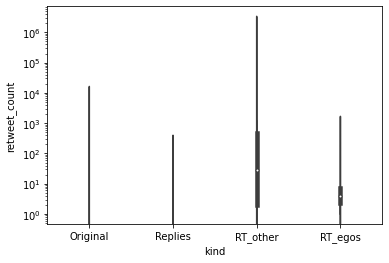

In [107]:
sns.violinplot(data=timeline,x = 'kind', y = 'retweet_count')
plt.yscale('log')

In [108]:
timeline.groupby(['kind']).agg({'retweet_count':['mean',q85,q90,q95,'count']})

retweet_count                                   
                  mean      q85     q90      q95    count
kind                                                     
Original      0.243366     0.00     0.0     1.00  2514619
RT_egos     118.071429    41.35   227.9   650.35       14
RT_other   2407.404925  1258.00  2359.0  6196.10  1054979
Replies       0.074003     0.00     0.0     1.00  1132646

Since we are trying to figure out how to maximize the retweet_count for our tweets, and retweets have the same retweet_count as the original tweets, we exclude them from our retweet_count analysis.\
We can see that most retweets are tweeted from users other than egos, which makes sense.\
Besides,an obvious observation is that if a tweet is retweeted by some sampled egos, then it's more likely to have a higher retweet_count.

According to supplementary information, only egos with utc_offset information are used to produce the circadian cycles.

Step 2. explore if Twitter usage changes according to month

Before checking out how tweeting time effects the retweet_count, let's first check out how Twitter usage changes according to time. The orignial paper examined the circadian rhythm of the day and week. So here, we examine the rhythm of the year.

In [109]:
# fetch egoID and creation time for each tweet
tweets = timeline[['egoID','created_at','retweet_count','kind']]

In [110]:
# merge ego and tweet information
time = tweets.merge(user_utc,on = 'egoID')

In [111]:
# normalize time to utc_time
time['local_time'] = time['created_at'] + pd.to_timedelta(time['utc_offset'],unit = 'S')
# get day of the week based on utc_time
time['weekday'] = time['local_time'].dt.weekday
time['hour'] = time['local_time'].dt.hour
time['month'] = time['local_time'].dt.month

Now group by month, to check out if there's any month pattern to twitter.

In [113]:
months = time.groupby(['kind','month']).agg(
    {'egoID':pd.Series.nunique,'weekday':'count','retweet_count':[q90,'mean',q95,q85]})

In [114]:
months.rename(columns = {'egoID':'num_users','weekday':'tweet_count'},inplace = True)

In [115]:
months = months.reset_index()

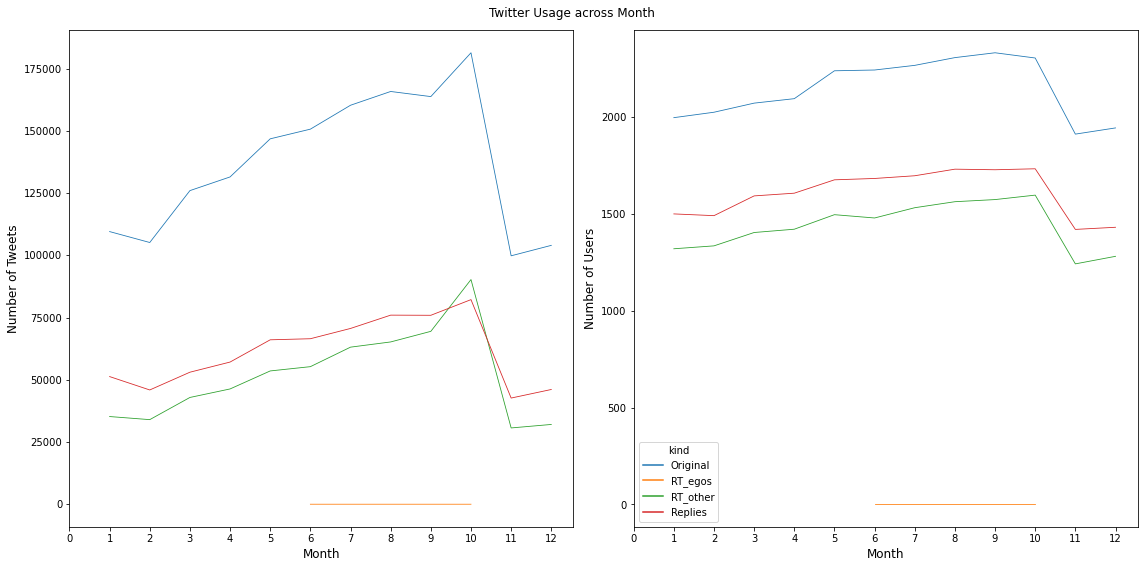

In [263]:
fig,axes = plt.subplots(1,2,figsize=(16,8))
ylabels = ['Number of Tweets','Number of Users']
for ind,col in enumerate([months['tweet_count']['count'],months['num_users']['nunique']]):
    sns.lineplot(ax = axes[ind],data = months,x = 'month',y = col,hue = 'kind',dashes = False,linewidth = 0.8,legend =(ind==1))
    axes[ind].set_xticks(np.arange(13))
    axes[ind].set_xlabel('Month',fontsize='large')
    axes[ind].set_ylabel(ylabels[ind],fontsize='large')
    
plt.suptitle('Twitter Usage across Month')
plt.tight_layout()
plt.show()

Wow,it seems like the usage of Twitter increases from November to next year's Octorber and then suddenly drops to the bottom and start to increase again, Why is that? Maybe we can check on the whole dataset. Since the possibilty to get wrong month due to utc_offset is not so great.

Include year in the plot this time, maybe not all years have the same pattern.

In [137]:
months_unnorm = timeline.groupby([timeline.created_at.dt.year,timeline.created_at.dt.month]).agg(
    {'egoID':pd.Series.nunique,'id':'count'})

months_unnorm.index.names = ['year','month']
months_unnorm = months_unnorm.reset_index()
months_unnorm.rename(columns={'egoID':'num_users','id':'num_tweets'},inplace=True)

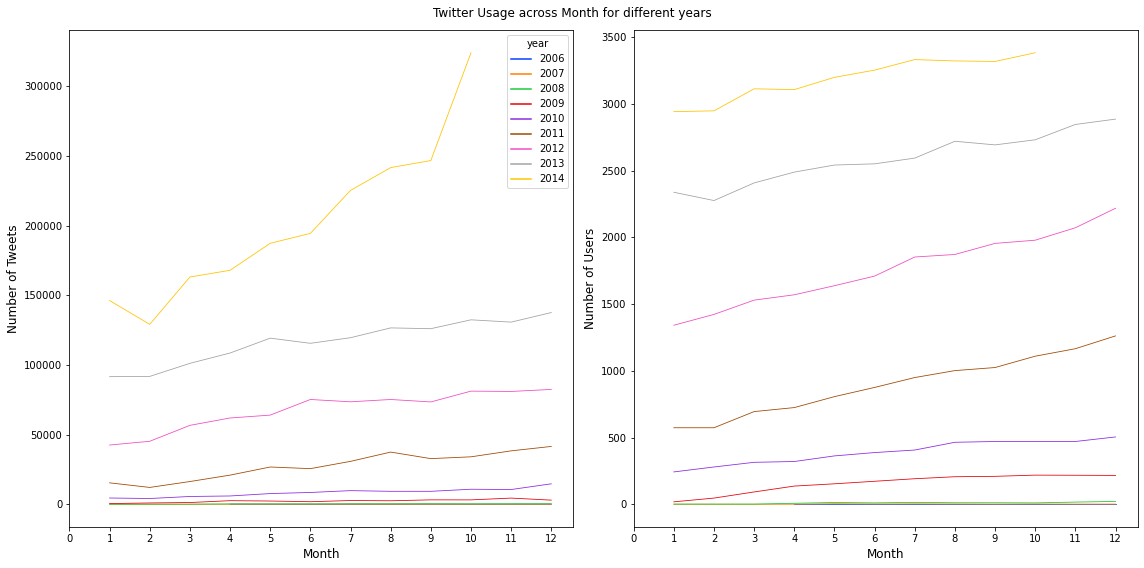

In [264]:
fig,axes = plt.subplots(1,2,figsize=(16,8))
ylabels = ['Number of Tweets','Number of Users']
for ind,col in enumerate(['num_tweets','num_users']):
    sns.lineplot(ax = axes[ind],data = months_unnorm,x = 'month',y = col,hue = 'year',
                 dashes = False,linewidth = 0.8,palette='bright',legend = (ind==0))
    axes[ind].set_xticks(np.arange(13))
    axes[ind].set_xlabel('Month',fontsize='large')
    axes[ind].set_ylabel(ylabels[ind],fontsize='large')
plt.suptitle('Twitter Usage across Month for different years')
plt.tight_layout()
plt.show()

Ah-hah, it turns out that there are more tweets in 2014 than other years. But the authors only colleted data before the November of 2014. And the usage of Twitter increases through out the year, but very likely, it's just because more people start to use Twitter over time. We can check out the growth trend below.

In [168]:
day_unnorm = timeline.groupby(timeline.created_at.dt.date).agg({'egoID':pd.Series.nunique,'id':'count'})

In [172]:
day_unnorm = day_unnorm.reset_index()

In [178]:
day_unnorm.rename(columns={'egoID':'num_users','id':'num_tweets'},inplace=True)

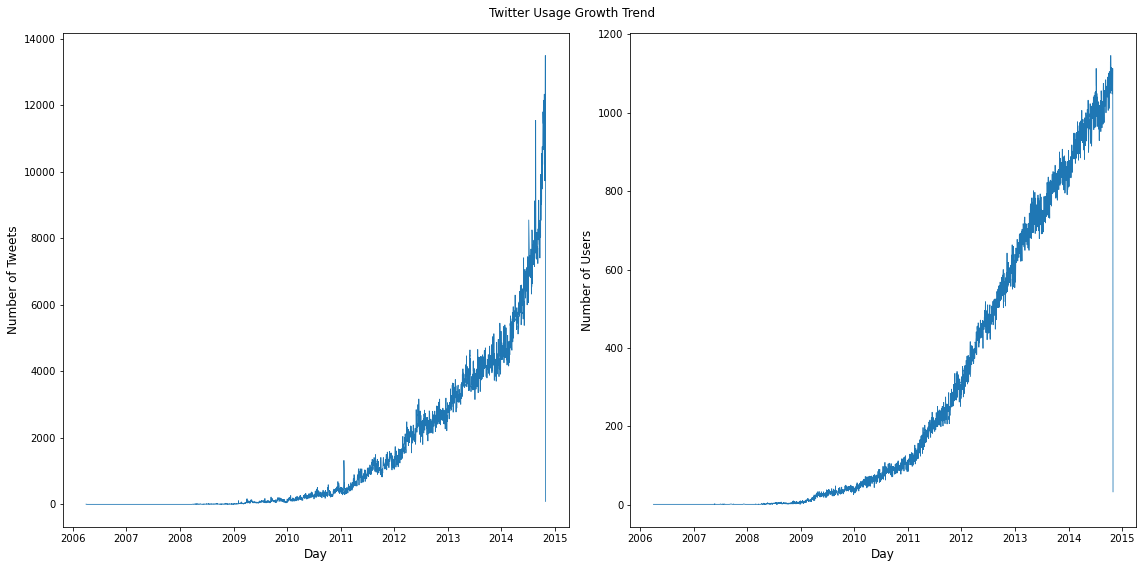

In [265]:
fig,axes = plt.subplots(1,2,figsize=(16,8))
ylabels = ['Number of Tweets','Number of Users']
for ind,col in enumerate(['num_tweets','num_users']):
    sns.lineplot(ax = axes[ind],data = day_unnorm,x = 'created_at',y = col,
                 dashes = False,linewidth = 0.8,palette='bright')
    #caxes[ind].set_xticks(np.arange(13))
    axes[ind].set_xlabel('Day',fontsize='large')
    axes[ind].set_ylabel(ylabels[ind],fontsize='large')
plt.suptitle('Twitter Usage Growth Trend')
plt.tight_layout()
plt.show()

Clearly, they didn't collect all the data for the last day : )

Step 3.retweet_count and time of tweeting\
Now Let's check out how tweeting time(hour and day of the week) effects the retweet_count. We will focus on non_retweets...(above)

step 3.1 distribution of retweet_count

In [273]:
def q98(x):
    return x.quantile(0.98)
def q80(x):
    return x.quantile(0.80)
def q25(x):
    return x.quantile(0.25)
def q75(x):
    return x.quantile(0.75)

In [184]:
non_retweets = time[(time.kind =='Original')|(time.kind == 'Replies')]

In [221]:
print("The maximum of retweet count is {}, and only {:2.2%} of non_retweets have at least 1 retweet,\
only {:2.2%} of non_retweets have at least 3 retweets, and only {:2.3%} have at least 10 retweets.".format(
    max(non_retweets['retweet_count']),
    len(non_retweets[non_retweets.retweet_count != 0])*1./len(non_retweets),
    len(non_retweets[non_retweets.retweet_count > 2])*1./len(non_retweets),
    len(non_retweets[non_retweets.retweet_count > 9])*1./len(non_retweets),
))

The maximum of retweet count is 16337, and only 8.19% of non_retweets have at least 1 retweet,only 1.17% of non_retweets have at least 3 retweets, and only 0.199% have at least 10 retweets.


Since we want to find out how to maximize retweet count, we will focus on those tweets that are retweeted at least 10 times below.

In [222]:
most_tweeted = non_retweets[non_retweets.retweet_count > 9]

We first check out how they are distributed.

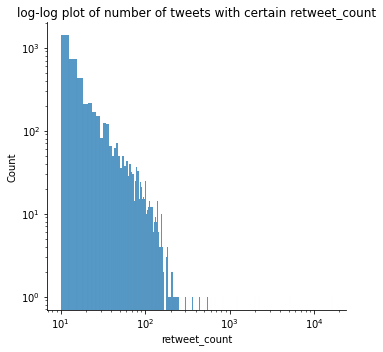

In [266]:
sns.displot(data = most_tweeted, x = 'retweet_count')
plt.xscale('log')
plt.yscale('log')
plt.title('log-log plot of number of tweets with certain retweet_count')
plt.tight_layout()
plt.show()

It is close to power law distribution. Now, finally we will get to know if we can maximize our retweet_count by choosing the right time.

Step 3.2 daily and weekly pattern

In [277]:
# split data according to day of the week
weekdays = []
for i in range(7):
    weekdays.append(most_tweeted[['egoID','local_time','weekday','hour','retweet_count']][most_tweeted.weekday == i])

In [278]:
# for each day, group by hour to get the user counts and tweet counts.
for i in range(7):
    weekdays[i] = weekdays[i].groupby('hour').agg(
    {'egoID':pd.Series.nunique,'weekday':'count','retweet_count': [q25,'median',q75,'count']})
    # reset index to get a column for hour for later plot
    # rename the columns
    weekdays[i].rename(columns = {'egoID': 'num_users','weekday':'num_tweets'},inplace = True)
    weekdays[i]['ave'] =  (weekdays[i]['retweet_count']['median']+ weekdays[i]['retweet_count']['q25']+
                           weekdays[i]['retweet_count']['q75'])/3

In [281]:
# put data from every workday into one dataframe
day_and_hour_retweets_ave = pd.DataFrame()  
day_and_hour_count = pd.DataFrame()
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in [6,0,1,2,3,4,5]:
    day_and_hour_retweets_ave[days[i]] = weekdays[i]['ave']
    day_and_hour_count[days[i]] =  weekdays[i]['retweet_count']['count']

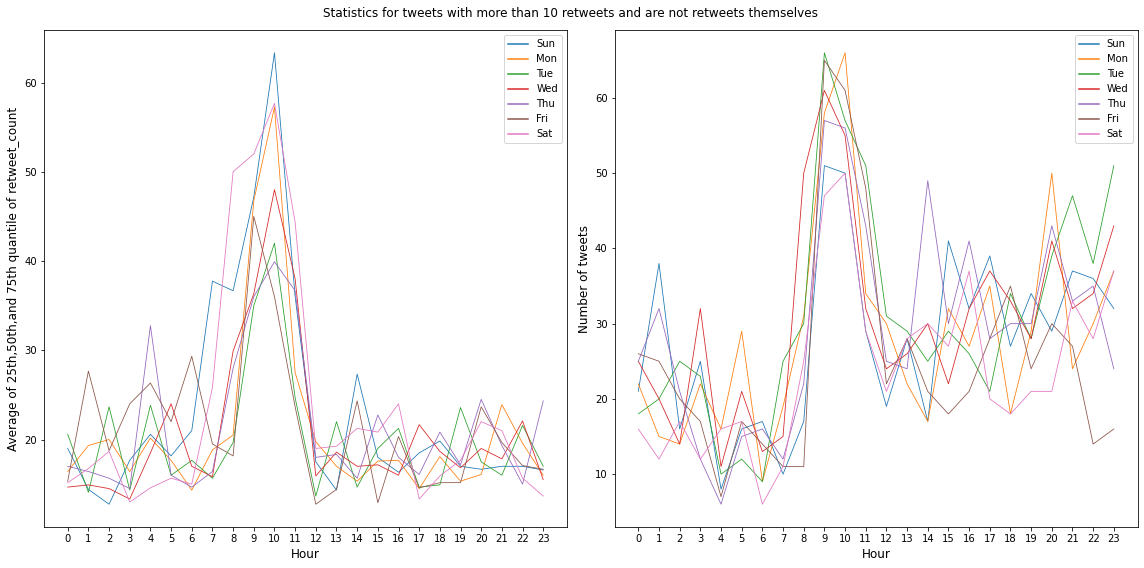

In [284]:
# set figure subplot and size 
fig,axes = plt.subplots(1,2,figsize=(16,8))
for ind, (col,label) in enumerate(zip([day_and_hour_retweets_ave,day_and_hour_count],['Average of 25th,50th,and 75th quantile of retweet_count','Number of tweets'])):
                                                                    
    sns.lineplot(ax = axes[ind],data = col,dashes = False,linewidth = 0.8)
    axes[ind].set_xticks(np.arange(24))
    axes[ind].set_xlabel('Hour',fontsize='large')
    axes[ind].set_ylabel(label,fontsize='large')

plt.suptitle('Statistics for tweets with more than 10 retweets and are not retweets themselves ')
plt.tight_layout()
plt.show()

From the above figure, we can tell that most of these tweets are posted at 10 a.m. And those posted at 9-11 a.m. received more retweets.

In [ ]:
most_tweeted_copy = most_tweeted.copy()
most_tweeted_copy['peek'] = most_tweeted_copy.apply(lambda x: 1 if x.hour in([9,10,11]) else 0,axis=1)

In [ ]:
stats.spearmanr(most_tweeted_copy['retweet_count'],most_tweeted_copy['peek'])

There is a small (0.28), but significant (p < 0.05) positive correlation

We don't have enough data available to train a decent classifier, so instead of propensity score matching，we will find some users to examine if the time of posting influences the retweet count.

In [306]:
most_tweeted[most_tweeted['retweet_count']<200].groupby('egoID')['created_at'].count().sort_values()

egoID
22         1
14728      1
14733      1
14759      1
14924      1
        ... 
10348    154
22881    226
21259    356
2604     426
18670    824
Name: created_at, Length: 380, dtype: int64

User 18670 have 824 tweets that are tweeted more than 10 times.

In [329]:
u18670 = most_tweeted[most_tweeted['egoID']==18670].copy()

In [337]:
u18670

,egoID,created_at,retweet_count,kind,utc_offset,lang,local_time,weekday,hour,month,peek
1876706,18670,2013-12-07 19:20:29+00:00,72,Original,-28800.0,en,2013-12-07 11:20:29+00:00,5,11,12,1
1876707,18670,2014-03-03 18:25:20+00:00,102,Original,-28800.0,en,2014-03-03 10:25:20+00:00,0,10,3,1
1876709,18670,2012-11-14 20:04:42+00:00,45,Original,-28800.0,en,2012-11-14 12:04:42+00:00,2,12,11,0
1876711,18670,2014-03-12 18:14:18+00:00,259,Original,-28800.0,en,2014-03-12 10:14:18+00:00,2,10,3,1
1876712,18670,2014-01-29 18:11:41+00:00,157,Original,-28800.0,en,2014-01-29 10:11:41+00:00,2,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1878052,18670,2011-12-30 18:58:52+00:00,15,Original,-28800.0,en,2011-12-30 10:58:52+00:00,4,10,12,1
1878054,18670,2011-12-28 18:08:17+00:00,13,Original,-28800.0,en,2011-12-28 10:08:17+00:00,2,10,12,1
1878055,18670,2011-12-27 16:53:01+00:00,37,Original,-28800.0,en,2011-12-27 08:53:01+00:00,1,8,12,0
1878056,18670,2011-12-22 21:39:21+00:00,11,Original,-28800.0,en,2011-12-22 13:39:21+00:00,3,13,12,0


In [336]:
u18670['peek'] = u18670.apply(lambda x: 1 if x.hour in([9,10,11]) else 0,axis=1)

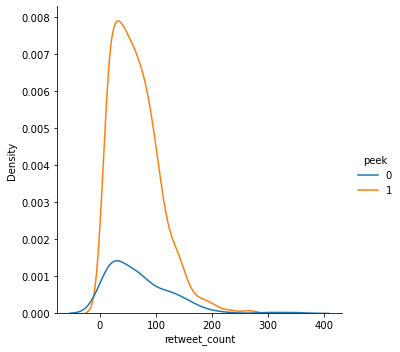

In [340]:
sns.displot(data=u18670,x='retweet_count',hue='peek',kind = 'kde')
plt.show()

For individual super tweeters, posting at peek hours doesn't make much different on retweet count.

In [311]:
len(peek_hours)

690

In [328]:
np.mean(peek_hours['retweet_count'])

65.11159420289854

In [327]:
np.mean(rn.choice(peek_hours['retweet_count'],134))

70.70149253731343

In [325]:
np.mean(u18670['retweet_count'])

65.91846522781775